#### Anomaly Detection Techniques: A Comprehensive Guide with Supervised and Unsupervised Learning

https://medium.com/@venujkvenk/anomaly-detection-techniques-a-comprehensive-guide-with-supervised-and-unsupervised-learning-67671cdc9680

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import pairwise_distances_argmin_min
from pyod.models.hbos import HBOS


from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

import tensorflow as tf
from tensorflow import keras


#### Supervised Learning for Anomaly Detection

k-Nearest Neighbors (KNN):

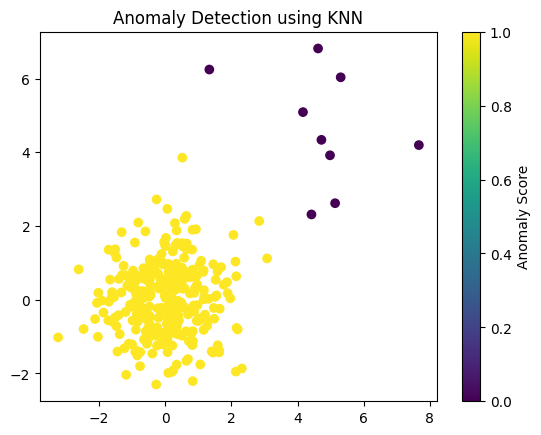

Detected anomalies: [300 301 302 304 305 306 307 308 309]


In [6]:

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Label the data (1 for normal data, 0 for anomalies)
labels = np.concatenate([np.ones(len(normal_data)), np.zeros(len(anomalies))])

# Initialize and fit the KNN model
k = 5  # Adjust the number of neighbors as needed
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(data, labels)

# Predict whether each data point is an anomaly (0 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using KNN")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == 0)[0]
print("Detected anomalies:", anomalies_indices)

One-Class SVM (Support Vector Machine):

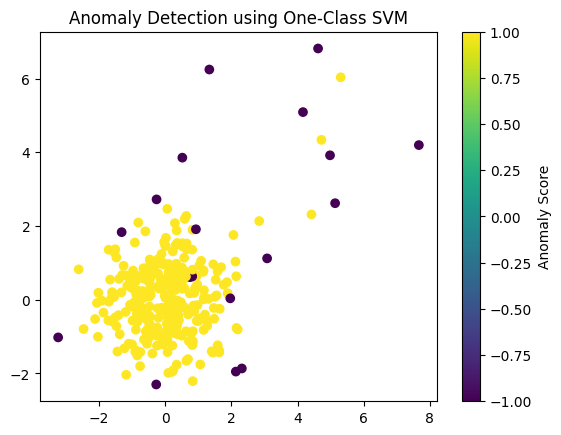

Detected anomalies: [ 89 104 110 131 142 149 151 196 230 235 239 250 300 302 304 305 307 308]


In [12]:
# Generate synthetic data with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Initialize and fit the One-Class SVM model
clf = OneClassSVM(nu=0.05, kernel="rbf")  # Adjust the nu parameter as needed
clf.fit(data)

# Predict whether each data point is an anomaly (-1 for anomalies, 1 for normal data)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using One-Class SVM")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)



Support Vector Data Description (SVDD):

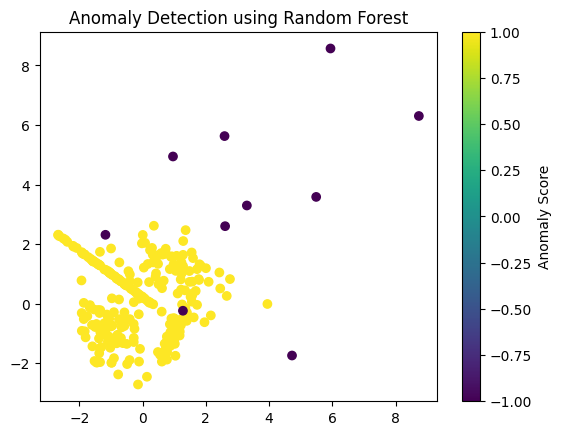

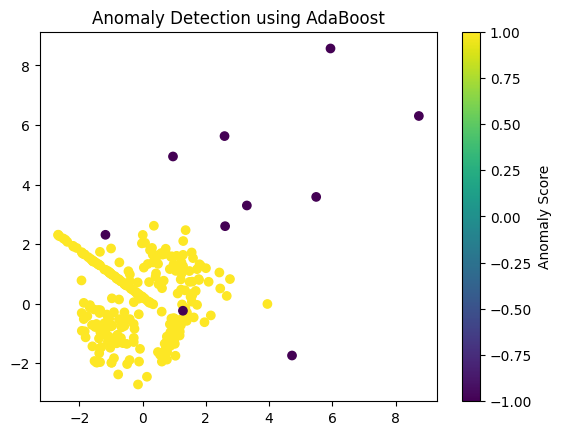

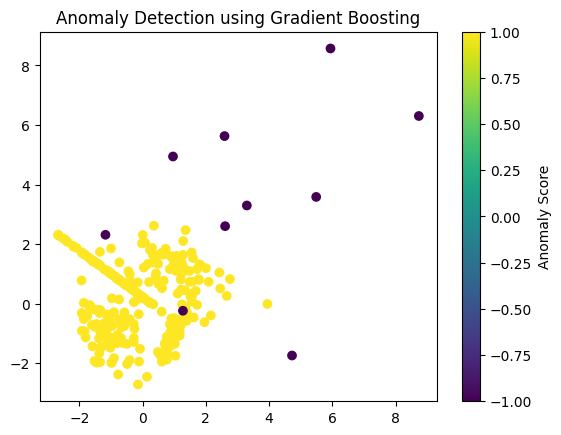

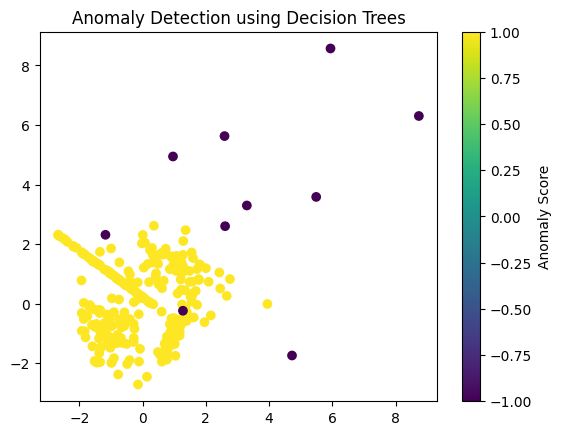

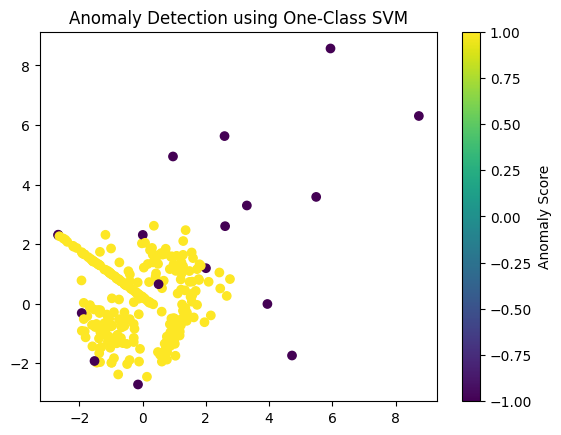

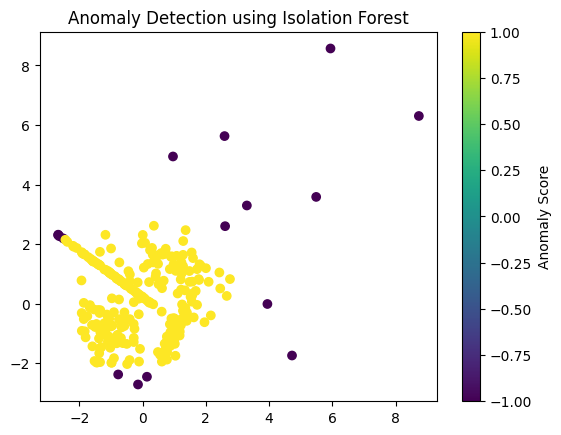

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from scipy.stats import norm

# Generate synthetic data with anomalies
np.random.seed(42)
normal_data, _ = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, random_state=42)
anomalies = np.random.randn(10, 2) * 3 + np.array([4, 4])  # Generating anomalies far from normal data
data = np.vstack([normal_data, anomalies])

# Labels (1 for normal data, -1 for anomalies)
labels = np.array([1] * len(normal_data) + [-1] * len(anomalies))

# Initialize and fit Random Forest classifier for anomaly detection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data, labels)
rf_predictions = rf.predict(data)

# Initialize and fit AdaBoost classifier for anomaly detection
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(data, labels)
ada_predictions = ada.predict(data)

# Initialize and fit Gradient Boosting classifier for anomaly detection
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(data, labels)
gb_predictions = gb.predict(data)

# Initialize and fit Decision Tree classifier for anomaly detection
dt = DecisionTreeClassifier(random_state=42)
dt.fit(data, labels)
dt_predictions = dt.predict(data)

# Initialize and fit One-Class SVM for anomaly detection
svm = OneClassSVM(kernel='rbf', nu=0.05)
svm.fit(data)
svm_predictions = svm.predict(data)

# Initialize and fit Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(data)
iso_forest_predictions = iso_forest.predict(data)

# Initialize and fit Extreme Value Theory (EVT) for anomaly detection
mu, sigma = norm.fit(data)  # Estimate distribution parameters
threshold = np.percentile(norm.pdf(data, mu, sigma), 95)  # Set a threshold
evt_predictions = (norm.pdf(data, mu, sigma) < threshold).astype(int)

# Visualize the results
def plot_anomaly_detection_results(predictions, title):
    plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
    plt.colorbar(label="Anomaly Score")
    plt.title(title)
    plt.show()

plot_anomaly_detection_results(rf_predictions, "Anomaly Detection using Random Forest")
plot_anomaly_detection_results(ada_predictions, "Anomaly Detection using AdaBoost")
plot_anomaly_detection_results(gb_predictions, "Anomaly Detection using Gradient Boosting")
plot_anomaly_detection_results(dt_predictions, "Anomaly Detection using Decision Trees")
plot_anomaly_detection_results(svm_predictions, "Anomaly Detection using One-Class SVM")
plot_anomaly_detection_results(iso_forest_predictions, "Anomaly Detection using Isolation Forest")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model: Isolation Forest
Confusion Matrix:
[[ 0  0  0]
 [ 1  0 58]
 [ 1  0 42]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00        59
         1.0       0.42      0.98      0.59        43

    accuracy                           0.41       102
   macro avg       0.14      0.33      0.20       102
weighted avg       0.18      0.41      0.25       102

Model: Logistic Regression
Confusion Matrix:
[[51  8]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        59
         1.0       0.84      0.95      0.89        43

    accuracy                           0.90       102
   macro avg       0.90      0.91      0.90       102
weighted avg       0.91      0.90      0.90       102

Model: Naive Bayes
Confusion Matrix:
[[50  9]
 [ 1 42]]
Classific

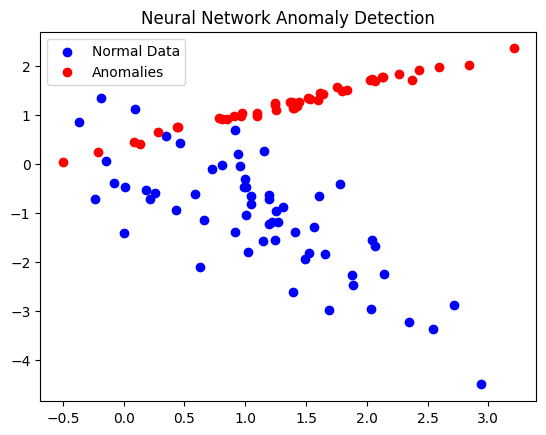

In [14]:


# Generate synthetic data with anomalies
np.random.seed(42)
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)
anomalies = 2 + 0.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data
X = np.vstack([X, anomalies])
y = np.hstack([y, np.ones(len(anomalies))])  # Anomalies are labeled as 1, normal data as 0

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Isolation Forest for Anomaly Detection
iforest = IsolationForest(contamination=0.05, random_state=42)
iforest.fit(X_train)
y_iforest_pred = iforest.predict(X_test)

# Logistic Regression for Anomaly Detection
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Naive Bayes for Anomaly Detection
nb = GaussianNB()
nb.fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)

# XGBoost for Anomaly Detection
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

# Neural Network for Anomaly Detection
nn_model = Sequential()
nn_model.add(Dense(8, input_dim=2, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
y_nn_pred = nn_model.predict(X_test)
y_nn_pred = (y_nn_pred > 0.5).astype(int)

# Evaluation
models = ["Isolation Forest", "Logistic Regression", "Naive Bayes", "XGBoost", "Neural Network"]
predictions = [y_iforest_pred, y_lr_pred, y_nb_pred, y_xgb_pred, y_nn_pred]

for model, y_pred in zip(models, predictions):
    print(f"Model: {model}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Visualization of Results (for Neural Network)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', label='Normal Data')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', label='Anomalies')
plt.title('Neural Network Anomaly Detection')
plt.legend()
plt.show()

Isolation Forest

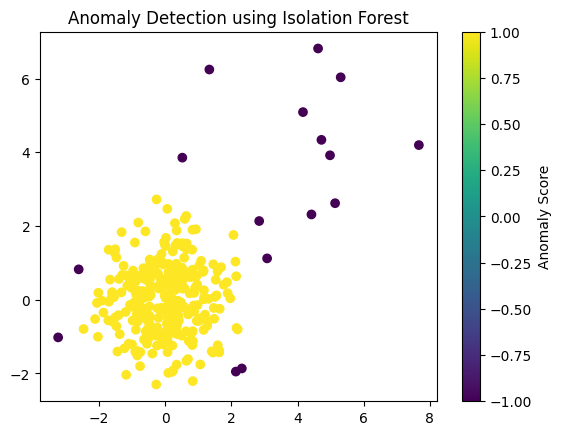

Detected anomalies: [ 37 104 110 131 142 239 300 301 302 303 304 305 306 307 308 309]


In [18]:
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Initialize and fit the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination parameter as needed
clf.fit(data)

# Predict whether each data point is an anomaly (1 for inliers, -1 for outliers)
predictions = clf.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.colorbar(label="Anomaly Score")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

# Identify anomalies (outliers)
anomalies_indices = np.where(predictions == -1)[0]
print("Detected anomalies:", anomalies_indices)

Density-Based Approaches

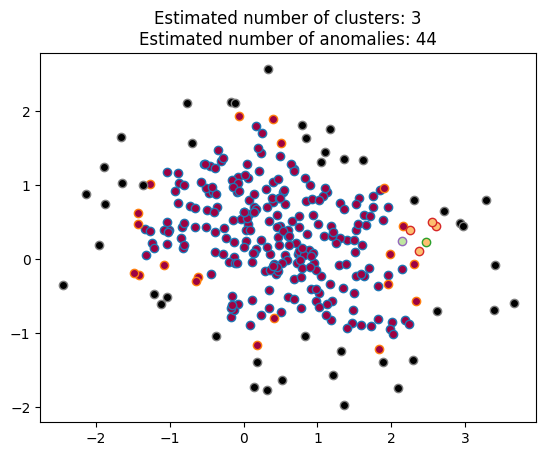

In [20]:
# Create a synthetic dataset with two moon-shaped clusters
X, _ = make_moons(n_samples=300, noise=0.6, random_state=42)

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get cluster labels (-1 indicates anomalies)
labels = dbscan.labels_

# Separate data points into clusters and anomalies
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot the clusters and anomalies
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for anomalies
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}\nEstimated number of anomalies: {n_noise_}')
plt.show()

Gaussian Mixture Models (GMM)

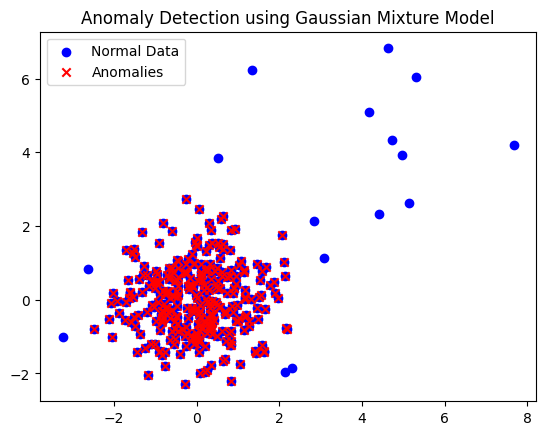

In [22]:

# Generate a synthetic dataset with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 2)
anomalies = 4 + 1.5 * np.random.randn(10, 2)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Train a Gaussian Mixture Model (GMM)
n_components = 5  # Number of Gaussian components
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(data)

# Calculate the likelihood scores for each data point
likelihoods = -gmm.score_samples(data)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(likelihoods, 95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
anomalies_indices = np.where(likelihoods < threshold)[0]

# Plot the data and highlight anomalies
plt.scatter(data[:, 0], data[:, 1], c='b', label='Normal Data')
plt.scatter(data[anomalies_indices, 0], data[anomalies_indices, 1], c='r', marker='x', label='Anomalies')
plt.legend()
plt.title('Anomaly Detection using Gaussian Mixture Model')
plt.show()

Autoencoders

In [24]:
# Generate a synthetic dataset with anomalies
np.random.seed(42)
normal_data = np.random.randn(300, 10)
anomalies = 4 + 1.5 * np.random.randn(10, 10)  # Generating anomalies far from normal data

# Combine normal and anomaly data
data = np.vstack([normal_data, anomalies])

# Build an autoencoder model
input_dim = data.shape[1]
encoding_dim = 5  # Adjust the bottleneck layer size as needed

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')  # Linear activation for reconstruction
])

model.compile(optimizer='adam', loss='mse')

# Train the autoencoder
model.fit(data, data, epochs=100, batch_size=32, shuffle=True)

# Calculate reconstruction errors
reconstructed_data = model.predict(data)
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)  # Adjust the percentile as needed

# Identify anomalies based on the threshold
anomalies_indices = np.where(reconstruction_errors > threshold)[0]
print("Detected anomalies:", anomalies_indices)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2731
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9859 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0984 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8744 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2001 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8619 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7837 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6949 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9074 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6607 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8043 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5206 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5341 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3943 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

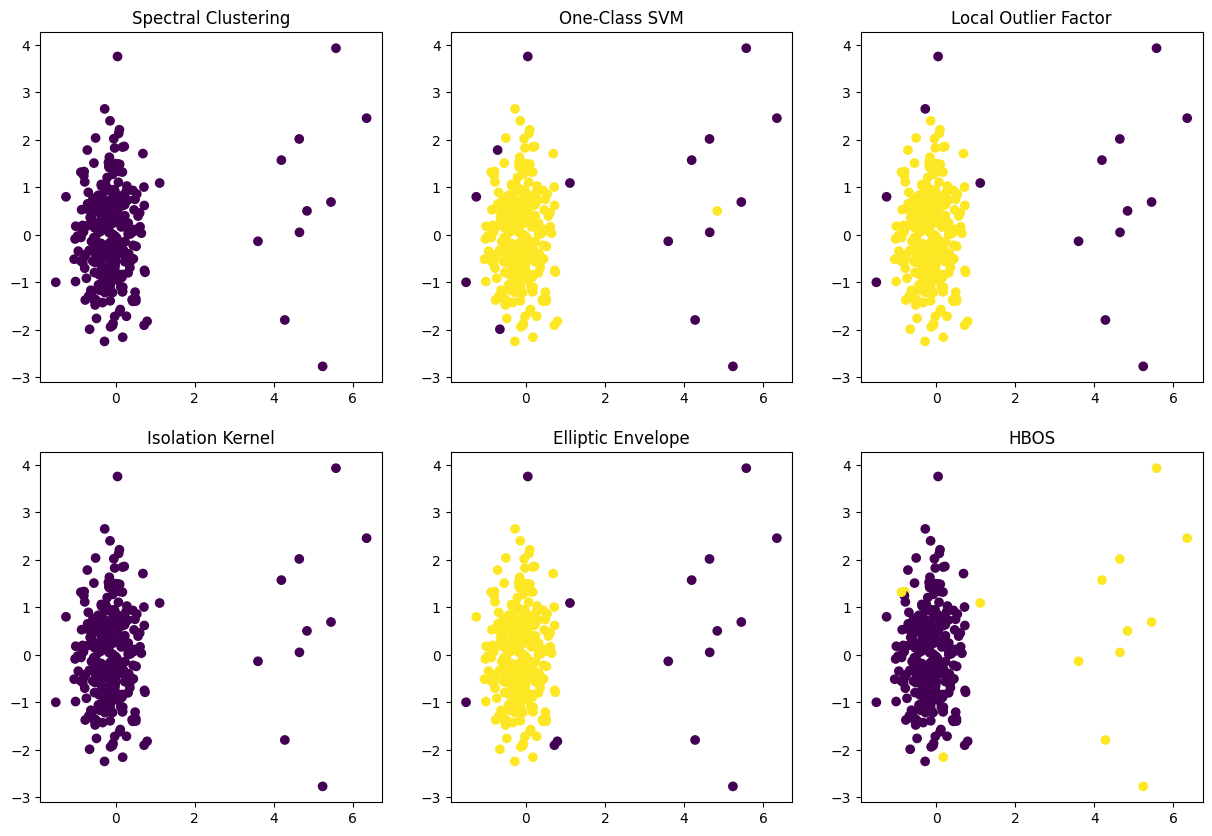

In [28]:

# Generate synthetic data with anomalies
np.random.seed(42)
n_samples = 300
n_features = 2
n_outliers = 10

X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=1, random_state=42)
X[:n_outliers] = 10 + 2 * np.random.randn(n_outliers, n_features)  # Adding anomalies

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create subplots for each method
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Spectral Clustering
spectral = SpectralClustering(n_clusters=1, affinity="nearest_neighbors")
spectral.fit(X)
labels_spectral = spectral.labels_
axs[0, 0].scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis')
axs[0, 0].set_title("Spectral Clustering")

# One-Class SVM
ocsvm = OneClassSVM(nu=0.05, kernel="rbf")
ocsvm.fit(X)
labels_ocsvm = ocsvm.predict(X)
axs[0, 1].scatter(X[:, 0], X[:, 1], c=labels_ocsvm, cmap='viridis')
axs[0, 1].set_title("One-Class SVM")

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels_lof = lof.fit_predict(X)
axs[0, 2].scatter(X[:, 0], X[:, 1], c=labels_lof, cmap='viridis')
axs[0, 2].set_title("Local Outlier Factor")

# Isolation Kernel
kernel = KMeans(n_clusters=1, random_state=42)
kernel.fit(X)
labels_kernel, _ = pairwise_distances_argmin_min(X, kernel.cluster_centers_)
axs[1, 0].scatter(X[:, 0], X[:, 1], c=labels_kernel, cmap='viridis')
axs[1, 0].set_title("Isolation Kernel")

# Elliptic Envelope
elliptic = EllipticEnvelope(contamination=0.05)
labels_elliptic = elliptic.fit_predict(X)
axs[1, 1].scatter(X[:, 0], X[:, 1], c=labels_elliptic, cmap='viridis')
axs[1, 1].set_title("Elliptic Envelope")

# HBOS (Histogram-Based Outlier Detection)
hbos = HBOS(contamination=0.05)
labels_hbos = hbos.fit_predict(X)
axs[1, 2].scatter(X[:, 0], X[:, 1], c=labels_hbos, cmap='viridis')
axs[1, 2].set_title("HBOS")

plt.show()

--------------------------------------Supervised Learning Techniques---------------------------------------


k-Nearest Neighbors (KNN):
- KNN can be adapted for anomaly detection by using the distance to the kth nearest neighbor as a measure of anomaly.
It classifies data points as anomalies if they are significantly different from their k-nearest neighbors.

One-Class SVM (Support Vector Machine):
- One-Class SVM is a supervised algorithm that learns to distinguish the majority class (normal) from the minority class (anomalies).
It constructs a hyperplane that separates normal data points from potential outliers.

Random Forest:
- While random forests are often used for classification tasks, they can also be used for supervised anomaly detection by treating one class as anomalies and the other as normal data.

Ensemble Methods:
- Ensemble methods like AdaBoost and Gradient Boosting can be used for anomaly detection by combining multiple weak learners to identify anomalies.

Decision Trees:
- Decision trees can be adapted for supervised anomaly detection by training a tree to classify data points as normal or anomalous based on their features.

Extreme Value Theory (EVT):
- EVT models are used to model the tail distribution of data and detect anomalies in extreme values by comparing them to the modeled distribution.

Support Vector Data Description (SVDD):
- SVDD is a variation of Support Vector Machines that constructs a hypersphere around normal data points and classifies anomalies as points outside the hypersphere.

XGBoost:
- XGBoost, an extension of gradient boosting, can be used as a supervised anomaly detection algorithm by treating one class as anomalies and the other as normal data.

Neural Networks:
- Deep learning techniques, such as feedforward neural networks and recurrent neural networks (RNNs), can be trained as supervised anomaly detectors.
Autoencoders, a type of neural network, are often used for unsupervised anomaly detection but can also be trained in a supervised manner.

Logistic Regression:
- Logistic regression can be used for supervised anomaly detection by learning a decision boundary that separates normal and anomalous data points.

Naive Bayes:
- Naive Bayes classifiers can be employed for supervised anomaly detection by modeling the probability distribution of normal data and identifying deviations from it.


--------------------------------------Unsupervised Learning Techniques---------------------------------------

Isolation Forest:
- An ensemble method that isolates anomalies by constructing random forests and isolating data points that require fewer splits in the tree to be isolated.
It’s a simple yet effective approach for detecting anomalies.


Density-Based Approaches:
- DBSCAN is particularly effective at identifying clusters of data points in high-density regions while labeling data points in low-density regions as anomalies or noise. It operates based on the concept of data density, making it robust to irregularly shaped clusters and capable of handling datasets with varying cluster sizes. Here’s how DBSCAN works and an example using scikit-learn.

Gaussian Mixture Models (GMM):
- GMMs are widely used for clustering and density estimation tasks, but they can also be applied to anomaly detection by identifying data points with low likelihoods under the modeled distribution. Here’s an explanation of how GMMs work for anomaly detection and a code example using scikit-learn’s GaussianMixture.

Autoencoders:
- Autoencoders consist of an encoder and a decoder network, and their primary purpose is to learn a compact representation of the input data. Anomalies can be detected by comparing the reconstruction error (difference between input and output) of the autoencoder. When the model encounters data that significantly deviates from the learned patterns, the reconstruction error tends to be high, indicating an anomaly. Here’s an introduction to autoencoders for unsupervised anomaly detection, along with code examples using TensorFlow and PyTorch

Spectral Clustering:
- Spectral clustering is a graph-based approach that can be used for anomaly detection by considering data points with low connectivity to the main cluster as anomalies.

One-Class SVM (Support Vector Machine):
- One-Class SVM constructs a hyperplane that separates the majority of the data from potential anomalies.
— It’s particularly useful when anomalies are rare and not well-distributed.

Local Outlier Factor (LOF):
- LOF computes the density of data points relative to their neighbors. Data points with significantly lower density than their neighbors are considered anomalies.
It’s effective in identifying local anomalies within a dataset.

Isolation Kernel (iKernel):
- iKernel is an extension of Isolation Forest that uses kernel methods to capture non-linear relationships in data.
It’s suitable for datasets with complex non-linear structures.

Elliptic Envelope:
- Elliptic Envelope fits a multivariate Gaussian distribution to the data and identifies anomalies based on their Mahalanobis distance from the estimated distribution.
It’s particularly useful for detecting multivariate outliers.

Histogram-Based Outlier Detection (HBOS):
- HBOS discretizes the feature space into a histogram and calculates the anomaly score based on the sparsity of histograms.
It’s efficient and works well for high-dimensional data.

Clustering-Based Approaches:
- Various clustering techniques, such as hierarchical clustering or k-means clustering, can be used for anomaly detection by treating data points in small clusters as anomalies.